<a href="https://colab.research.google.com/github/mikeyshean/pytorch-notebooks/blob/master/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (binary or multi-class)



 ## 1. Make classifcation data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Make cycles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f'First 5 samples of X:\n {X[:5]}')
print(f'First 5 samples of y:\n {y[:5]}')

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


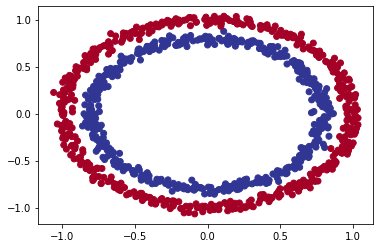

In [6]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape} ")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: () 


### 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch
torch.__version__

'1.12.1+cu113'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of dat will be test & 80% will be train
                                                    random_state=42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [16]:
n_samples

1000

## 2. Building a model

Build a model to classify our blue and red dat

1. Setup device agnostic code
2. Construct a model (by sublcass `nn.Module`) 
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
# Import PyTorch and nn
import torch
from torch import nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [18]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

### 2.1 Construct a model

1. Subclass `nn.Module` 
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass of the model
4. Instantiate an instance of our model class and send it to the target `device` 

In [19]:
# 1. Construct a model that subclasses `nn.Module()`
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    # self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    # self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and outputs a single feature (same shape as y)

    # Alternative approach using nn.Sequential
    self.two_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
  
  # 3. Define a forward method that outlines the forward pass
  def forward(self, x):
    # return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    return self.two_layers(x)
  

# 4 Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0()
model_0

CircleModelV0(
  (two_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [20]:
device

device(type='cuda', index=0)

In [21]:
next(model_0.parameters()).device

device(type='cpu')

In [22]:
# Replicate the model above by using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=32),
    nn.Linear(in_features=32, out_features=64),
    nn.Linear(in_features=64, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): Linear(in_features=32, out_features=64, bias=True)
  (2): Linear(in_features=64, out_features=1, bias=True)
)

In [23]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[ 0.5474, -0.1257],
                      [-0.3435,  0.1902],
                      [-0.3885, -0.2838],
                      [-0.3064, -0.5782],
                      [ 0.6577, -0.2502],
                      [ 0.0195, -0.0868],
                      [ 0.2947,  0.6507],
                      [-0.1258,  0.0009],
                      [ 0.4718,  0.2112],
                      [ 0.1164,  0.2008],
                      [ 0.1659, -0.2708],
                      [-0.0498,  0.2354],
                      [ 0.1244,  0.5351],
                      [ 0.1847,  0.0259],
                      [-0.5159, -0.5389],
                      [ 0.5777,  0.0680],
                      [-0.5004,  0.1626],
                      [-0.5108, -0.6959],
                      [ 0.2226,  0.5489],
                      [-0.7026, -0.4093],
                      [ 0.3966,  0.7027],
                      [-0.0282,  0.2124],
                      [-0.0800, -0.0976],
                      

In [24]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
  print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
  print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
  print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
  print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.1816],
        [0.1746],
        [0.1792],
        [0.1824],
        [0.1461],
        [0.1421],
        [0.1486],
        [0.1409],
        [0.1806],
        [0.1738]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Problem specific:

- Regression: Could be MAE or MSE (Mean absolute error or Mean squared error)
- Classification: Could be binary cross entropy or categorical cross entropy (cross entropy)

As a reminder, loss function measures how *wrong* your model's predictions are.

For optimizers: two of the most common are SGD and Adam, however, PyTorch has many built-in options

* For loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more info: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* Defition of logit in deep learning: https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow
* For different opimizers see `torch.optim`

In [26]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gonethrought he sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [27]:
# Calculate accuracy - what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### 3. Train model

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can conver these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for bianry classification and softmax for multiclass classification.)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [28]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.1816],
        [0.1746],
        [0.1792],
        [0.1824],
        [0.1461]], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5453],
        [0.5435],
        [0.5447],
        [0.5455],
        [0.5365]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [31]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [32]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Build a training and tesitng loop

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
EPOCHS = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(EPOCHS):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # sigmoid turns logits -> pred_probs -> pred_labels

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (SGF)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # Forward pass
    y_test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(y_test_logits))

    # Calculate the loss
    test_loss = loss_fn(y_test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)
    
    # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} , Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69656, Acc: 50.00% | Test loss: 0.69558 , Test acc: 50.00%
Epoch: 10 | Loss: 0.69320, Acc: 56.62% | Test loss: 0.69386 , Test acc: 52.50%
Epoch: 20 | Loss: 0.69303, Acc: 51.25% | Test loss: 0.69421 , Test acc: 47.50%
Epoch: 30 | Loss: 0.69300, Acc: 50.88% | Test loss: 0.69444 , Test acc: 45.50%
Epoch: 40 | Loss: 0.69299, Acc: 51.00% | Test loss: 0.69456 , Test acc: 46.50%
Epoch: 50 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69462 , Test acc: 47.50%
Epoch: 60 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69464 , Test acc: 47.00%
Epoch: 70 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69466 , Test acc: 46.50%
Epoch: 80 | Loss: 0.69298, Acc: 50.88% | Test loss: 0.69467 , Test acc: 46.50%
Epoch: 90 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69467 , Test acc: 46.00%
Epoch: 100 | Loss: 0.69298, Acc: 51.25% | Test loss: 0.69467 , Test acc: 46.00%
Epoch: 110 | Loss: 0.69298, Acc: 51.50% | Test loss: 0.69468 , Test acc: 45.50%
Epoch: 120 | Loss: 0.69298, Acc: 51.38% | Test loss

## 4. Make predictions and evaluate the model

From the metrics it looks like the model isn't learning

So to inspect it let's make some predictions and make them visual.

To do so, we'll import a function called `plot_decision_boundary()`

In [34]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, Skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


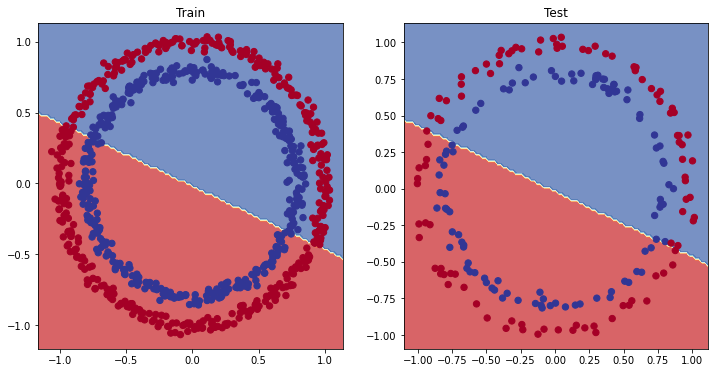

In [35]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

Improve through experimenation with **hyperparameters**:
- Add more layers - give the model more chances to learn about patterns in the data
- Add more hidden units - go from 5 hidden units to 10 hidden units
- Fit for longer (more epochs)
- Changing the activation functions
- Change the learning rate
- Change the loss function



In [36]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  
  def forward(self, x: torch.Tensor):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [38]:
# Write training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Move to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
                                              
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> pred labels

  # 2. Calculate the loss / accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    y_test_logits = model_1(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))

    # 2. Calculate the loss / acc
    test_loss = loss_fn(y_test_logits,
                        y_test)
    test_acc = accuracy_fn(y_test,
                           y_test_pred)
  
  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} |, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
  

Epoch: 0 | Loss: 0.69396 |, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305 |, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299 |, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298 |, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298 |, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298 |, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298 |, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298 |, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298 |, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298 |, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


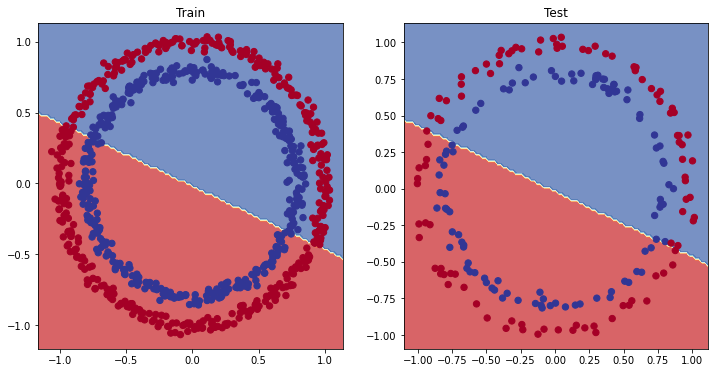

In [39]:
# Plot the decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

Troubleshoot a larger problem by testing a smaller problem

In [40]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [41]:
# Create training and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

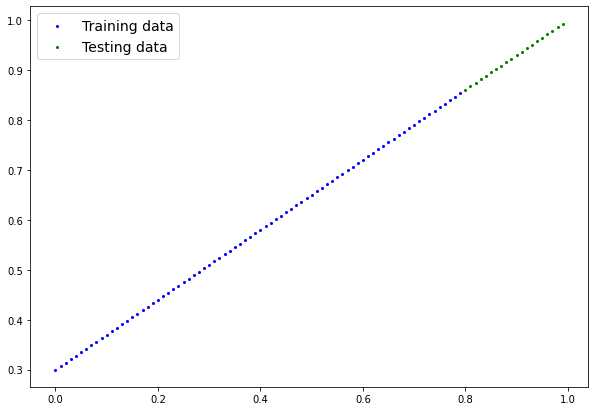

In [42]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_0` to fit a straight line

In [43]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
# Same architeture as model_1 using nn.Sequential
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [46]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Move to device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)
model_2.to(device)

epochs = 1000

for epoch in range(epochs):
  model_2.train()

  # 1. Forward pass
  preds = model_2(X_train_regression)

  # 2. Calculate the loss
  loss = loss_fn(preds, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


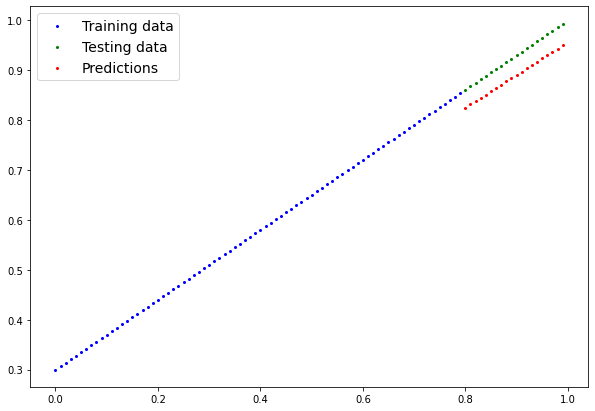

In [47]:
# Turn on evaluation
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(X_train_regression.cpu(),
                 y_train_regression.cpu(),
                 X_test_regression.cpu(),
                 y_test_regression.cpu(),
                 y_preds.cpu())

## 6. The missing piece: non-linearality



### 6.1 Recreating non-linear data (red and blue circles)

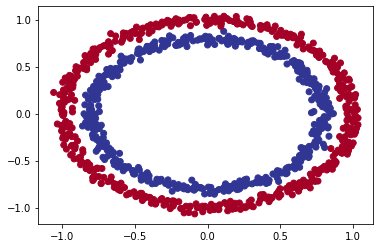

In [48]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [49]:
# Convert data to tensors and then to train/test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearality

In [50]:
# Build a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
  

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [51]:
# Setup loss fn and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)


In [52]:
# Build a training / testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Move data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

model_3.to(device)
for epoch in range(epochs):
  ### Training
  model_3.train()

  logits = model_3(X_train).squeeze()
  preds = torch.round(torch.sigmoid(logits))
  loss = loss_fn(logits, y_train)
  acc = accuracy_fn(y_train, preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)
  
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test loss: 0.68940, Test acc: 55.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test loss: 0.68723, Test acc: 56.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test loss: 0.68411, Test acc: 56.50%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test loss: 0.67941, Test acc: 56.50%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test loss: 0.67285, Test acc: 56.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test loss: 0.66322, Test acc: 59.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test loss: 0.64757, Test acc: 67.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test loss: 0.62145, Test acc: 79.00%


In [53]:
# Make predictions

model_3.eval()
with torch.inference_mode():
  logits = model_3(X_test).squeeze()
  preds = torch.round(torch.sigmoid(logits))

preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

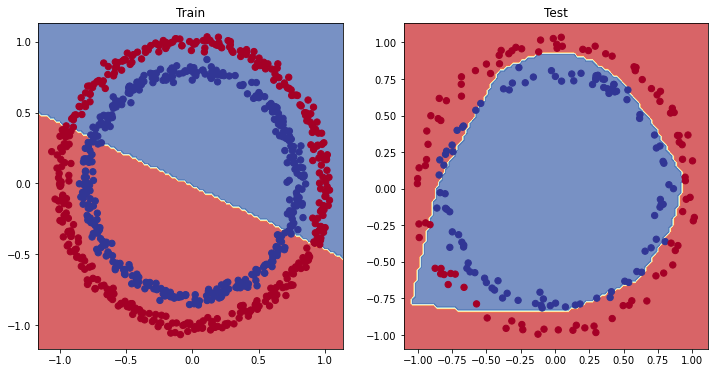

In [54]:
# Plot decision boundaries

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## 7. Replicating non-linear activation functions

Rather than telling the model what to learn, we will give it tools to discover patterns in data on its own.

These tools are linear and non-linear functions.

In [55]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float)
A.dtype

torch.float32

In [56]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

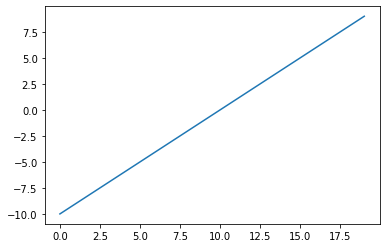

In [57]:
# Visualize
plt.plot(A)

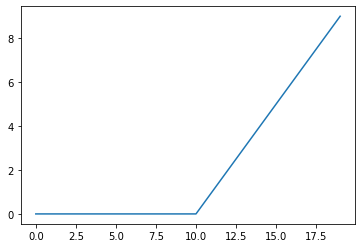

In [58]:
plt.plot(torch.relu(A))

In [59]:
# Implement our own relu function
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x)

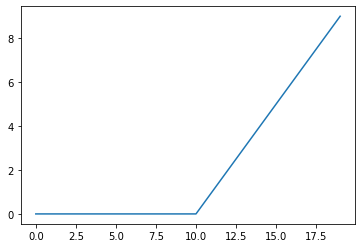

In [60]:
plt.plot(relu(A))

In [61]:
# Try the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

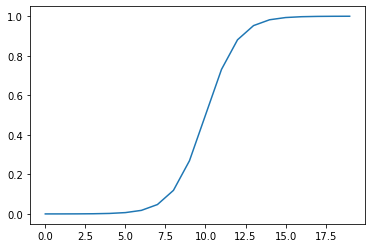

In [62]:
plt.plot(torch.sigmoid(A))

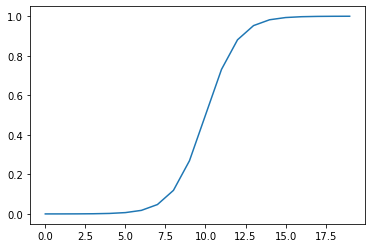

In [63]:
plt.plot(sigmoid(A))

## 8. Putting it all toegether with a multi-class classification problem

* Binary classification: One thing or another (hot dog vs. not hot dog)
* Multi-class classification: More than two classes (hot dog vs. pizza vs. sushi)
                                               

### 8.1 Creating a toy multi-class dataset

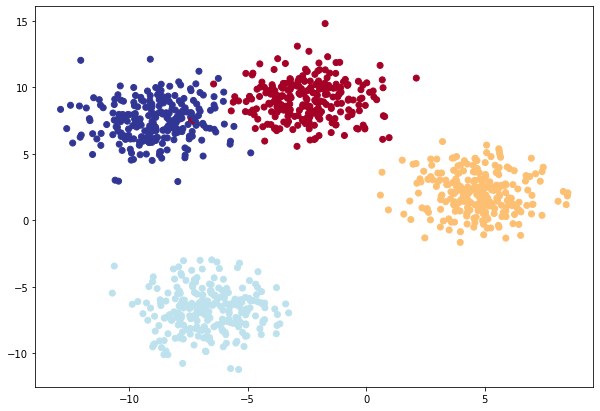

In [64]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into training and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
# 4. Plot data (Visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)


### 8.2 Building a multi-class classification model in PyTorch

In [65]:
# Create device agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [82]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance and send to target device
model_4 = BlobModel(input_features=2, output_features=4).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [83]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0], device='cuda:0'))

In [84]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3], device='cuda:0')

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [85]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting prediction probabilties for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [86]:
# Get raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

In [87]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [88]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_logits[:10], y_pred_probs[:10]

(tensor([[ 0.8161, -0.8846, -0.2847,  0.4252],
         [-0.9359, -2.0669,  0.9583, -2.2816],
         [-0.6742, -0.0694,  0.8067, -1.3123],
         [ 0.6858, -0.5307, -0.1840,  0.3610],
         [ 0.1430, -1.9414,  0.1816, -0.8017],
         [-1.1805, -2.3145,  1.1303, -2.6851],
         [-0.4175,  0.1534,  0.6255, -0.9003],
         [-0.1357, -1.9379,  0.3829, -1.1728],
         [-1.0798, -0.3154,  1.0950, -1.9303],
         [-0.0296, -1.9148,  0.3067, -1.0240]], device='cuda:0'),
 tensor([[0.4563, 0.0833, 0.1518, 0.3087],
         [0.1215, 0.0392, 0.8077, 0.0316],
         [0.1289, 0.2361, 0.5669, 0.0681],
         [0.4102, 0.1215, 0.1719, 0.2964],
         [0.3918, 0.0487, 0.4072, 0.1523],
         [0.0860, 0.0277, 0.8672, 0.0191],
         [0.1606, 0.2843, 0.4559, 0.0991],
         [0.3126, 0.0516, 0.5250, 0.1108],
         [0.0808, 0.1736, 0.7111, 0.0345],
         [0.3423, 0.0520, 0.4791, 0.1266]], device='cuda:0'))

In [89]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0')

In [90]:
torch.argmax(y_pred_probs[0]) # Get the index of the max value

tensor(0, device='cuda:0')

In [91]:
# Convert our model's prediction proabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
        2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
        0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
        0, 2, 2, 2, 2, 0, 2, 0], device='cuda:0')

In [92]:
### 8.5 Create a training and testing loop for multi-class PyTorch model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# Move to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test)
    y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(y_test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=y_test_pred)
  
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f}, Acc: {acc:.2f}% | Test loss: {test_loss:.2f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.92, Acc: 26.00% | Test loss: 0.85, Test acc: 55.00%
Epoch: 10 | Loss: 0.29, Acc: 97.12% | Test loss: 0.24, Test acc: 98.00%
Epoch: 20 | Loss: 0.12, Acc: 99.00% | Test loss: 0.10, Test acc: 98.50%
Epoch: 30 | Loss: 0.08, Acc: 99.00% | Test loss: 0.07, Test acc: 98.50%
Epoch: 40 | Loss: 0.06, Acc: 99.00% | Test loss: 0.05, Test acc: 99.00%
Epoch: 50 | Loss: 0.05, Acc: 99.00% | Test loss: 0.04, Test acc: 99.00%
Epoch: 60 | Loss: 0.05, Acc: 99.00% | Test loss: 0.04, Test acc: 99.50%
Epoch: 70 | Loss: 0.04, Acc: 99.00% | Test loss: 0.03, Test acc: 99.50%
Epoch: 80 | Loss: 0.04, Acc: 99.00% | Test loss: 0.03, Test acc: 99.50%
Epoch: 90 | Loss: 0.04, Acc: 99.00% | Test loss: 0.03, Test acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [93]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

  # Convert logits to prediction probabilities with softmax, then predictions with argmax
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_preds[:5], y_blob_test[:5]

(tensor([1, 3, 2, 1, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0], device='cuda:0'))

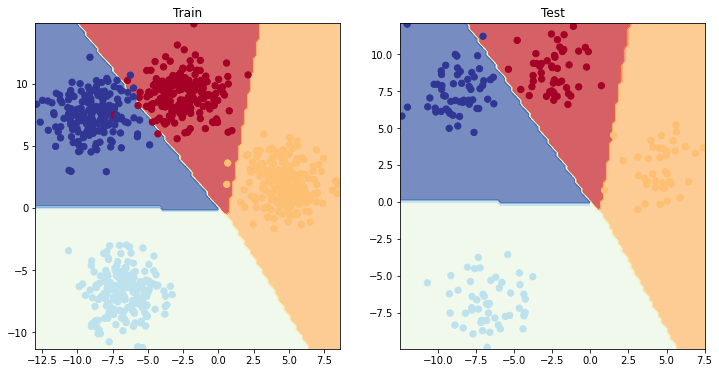

In [94]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


## 9. A few more classification metrics (to evaluate our classfication model)

- Accuracy - out of 100 samples, how many does our model get right?
- Precision
- Recall
- F1-score
- Confusion matrix
- Classification report

In [95]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 10.9 MB/s 


In [97]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy().to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')